# Wine Analysis

## Aron Sun and Jordan Foster

## CMSC320

### Introduction

Today, the mention of a wine is almost synonomus to its quality. In this regard, the question we wanted answered was is there some wines that are inheriently better than other wines? One way to judge the quality of wine is by setiment. Often setiment is generated by the consumer in the form of reivews on the internet. However, wine setiment is not only exclusive to the consumer but also to a small group of professional wine tasters. These professional are often critizced for rating wines randomly with no ryme or reason. So we wanted to answer the age old quesiton, do professional wine tasters really know what they are doing?

### Data Collection

There are alot of professional wine tasters, and thier reivews of wines can be found on many websites. However, we also found a precomplied dataset of professional wine reviews on kaggle.com that we decieded to use.

In [44]:
!pip install spacy
!pip install nltk
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
import numpy as np
import seaborn as sns
import string
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
# raw data
wine_df = pd.read_csv("wine.csv")
reviews = wine_df
wine_df = wine_df.drop(['Unnamed: 0', 'description', 'designation', 'region_2', \
                        'taster_twitter_handle', 'title', 'taster_name'], axis=1)
wine_df.head()

,country,points,price,province,region_1,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks


### Data Cleanup

Numerical values are given to the columns with non-numerical values ('country', 'variety', 'province', 'region_1', 'variety', 'winery') in order for them to be used in the prediction of a wines score (points).

In [46]:
# assign numerical values to string columns
str_cols = ['country', 'variety', 'province', 'region_1', 'variety', 'winery']

for col in str_cols:
    wine_df[col] = pd.factorize(wine_df[col])[0]

wine_df

,country,points,price,province,region_1,variety,winery
0,0,87,NaN,0,0,0,0
1,1,87,15.0,1,-1,1,1
2,2,87,14.0,2,1,2,2
3,2,87,13.0,3,2,3,3
4,2,87,65.0,2,1,4,4
...,...,...,...,...,...,...,...
129966,5,90,28.0,8,-1,3,5244
129967,2,90,75.0,2,13,4,7639
129968,4,90,30.0,5,5,7,10215
129969,4,90,32.0,5,5,2,5348


### Data Analysis

Shows simple prediction methods cant acurately predict the score of a wine based off of the parameters used above.

## Note:

idk which one we want to include

In [4]:
X = wine_df.drop(['points'], axis=1).to_numpy('int64')
y = wine_df['points']
X

array([[                   0, -9223372036854775808,                    0,
                           0,                    0,                    0],
       [                   1,                   15,                    1,
                          -1,                    1,                    1],
       [                   2,                   14,                    2,
                           1,                    2,                    2],
       ...,
       [                   4,                   30,                    5,
                           5,                    7,                10215],
       [                   4,                   32,                    5,
                           5,                    2,                 5348],
       [                   4,                   21,                    5,
                           5,                    7,                 2777]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### linear regression

In [6]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-4.65322373e-09, -5.12190002e-20, -8.97987985e-08, -5.55497060e-07,
       -1.03702589e-07, -8.99944557e-05])

In [7]:
model.score(X_test,y_test)

0.015686482142967195

### linear discriminant analysis

In [8]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
lda_model.score(X_test,y_test)

0.13279783337949713

### classification tree

In [10]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
dt_model.score(X_test,y_test)

0.23602006586033916

### kNN

In [12]:
n = int(np.floor(np.sqrt(len(wine_df))))
neigh = KNeighborsClassifier(n_neighbors=n)
neigh.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=360)

In [13]:
neigh.score(X_test,y_test)

0.15412550395469793

### Random Forrest

In [14]:
# takes a LONG time to run

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
rf_model.score(X_test,y_test)

0.24996153017573017

**Note:** In all of these analysis the the text description of the review isnt used. If its included can we do better?

# NLP

we want to use NLP to categorize what a good review/description for wine looks like, heres the descriptions

In [89]:
reviews['description'].head()

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
Name: description, dtype: object

Stop words are words such as prepositions and possesive words that we will remove for NLP

In [48]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Tokenizer that removes stop words and also adds a frequency count to `freq_dict`

In [49]:
freq_dict = {}
def tokenize(s):
    # remove punc
    s = s.translate(str.maketrans('', '', string.punctuation))
    toks = nltk.word_tokenize(s)
    filtered_toks = [w for w in toks if not w in stop_words]
    for x in filtered_toks:
        freq_dict[x] = freq_dict.get(x, 0) + 1
    return filtered_toks

In [64]:
freq_dict = {}
tok_descrip = reviews['description'].apply(tokenize)
tok_descrip

0         [Aromas, include, tropical, fruit, broom, brim...
1         [This, ripe, fruity, wine, smooth, still, stru...
2         [Tart, snappy, flavors, lime, flesh, rind, dom...
3         [Pineapple, rind, lemon, pith, orange, blossom...
4         [Much, like, regular, bottling, 2012, comes, a...
                                ...                        
129966    [Notes, honeysuckle, cantaloupe, sweeten, deli...
129967    [Citation, given, much, decade, bottle, age, p...
129968    [Welldrained, gravel, soil, gives, wine, crisp...
129969    [A, dry, style, Pinot, Gris, crisp, acidity, I...
129970    [Big, rich, offdry, powered, intense, spicines...
Name: description, Length: 129971, dtype: object

Here we want to remove redundant words such as Wine, The, It, etc..

In [ ]:
words_to_pop = ['Wine', 'The', 'This', 'Its', 'A', 'Is', 'It']
for key in words_to_pop:
    if key in freq_dict.keys():
        freq_dict.pop(key)
    elif key.lower() in freq_dict.keys():
        freq_dict.pop(key.lower())

freq_dict

In [86]:
sorted_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))

In [87]:
sorted_freq_dict

{'flavors': 60205,
 'fruit': 44793,
 'palate': 38079,
 'aromas': 35424,
 'finish': 34940,
 'acidity': 34530,
 'tannins': 30503,
 'cherry': 27001,
 'ripe': 24931,
 'black': 24428,
 'Drink': 20406,
 'notes': 18552,
 'spice': 18485,
 'red': 17960,
 'nose': 16897,
 'oak': 16221,
 'rich': 16051,
 'fresh': 15417,
 'berry': 15294,
 'dry': 14068,
 'plum': 13770,
 'fruits': 13503,
 'blend': 13041,
 'offers': 12558,
 'apple': 12521,
 'texture': 12364,
 'blackberry': 12220,
 'soft': 12086,
 'white': 12017,
 'crisp': 11782,
 'sweet': 11774,
 'citrus': 11057,
 'shows': 10563,
 'Cabernet': 10503,
 'vanilla': 10444,
 'well': 10416,
 'dark': 10119,
 'light': 9850,
 'bright': 9820,
 'pepper': 9562,
 'drink': 9560,
 'full': 9169,
 'juicy': 9109,
 'fruity': 9096,
 'raspberry': 9069,
 'green': 8697,
 'good': 8676,
 'touch': 8517,
 'firm': 8490,
 'character': 8325,
 'peach': 8322,
 'lemon': 8216,
 'chocolate': 8140,
 'years': 7708,
 'pear': 7648,
 'structure': 7574,
 'dried': 7562,
 'balanced': 7558,
 'Sau

These are the top 20 most common words used in the review for wine

Text(0.5, 1.0, 'Top 20 Most Common Words')

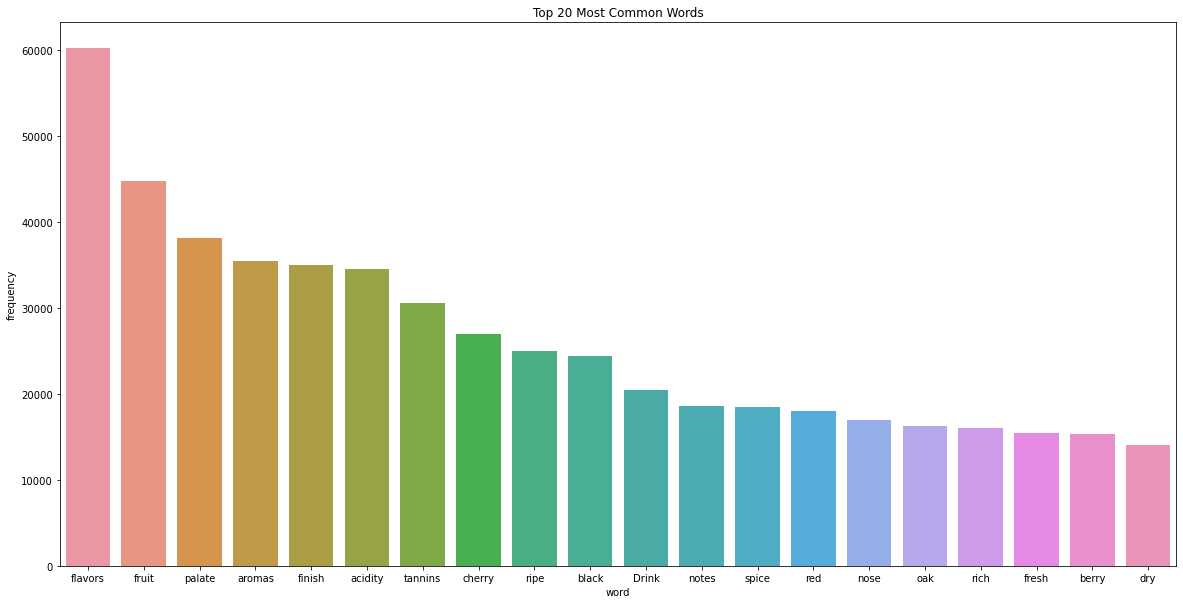

In [88]:
# Data to plot
labels = []
sizes = []

for x, y in sorted_freq_dict.items():
    labels.append(x)
    sizes.append(y)

dims = (20,10)
fig, ax = plt.subplots(figsize=dims)
ax.set(xlabel='word', ylabel='frequency')
sns.barplot(x=labels[:20], y=sizes[:20]).set_title('Top 20 Most Common Words')